Comments
"""
https://www.degreetutors.com/direct-stiffness-method/
"""


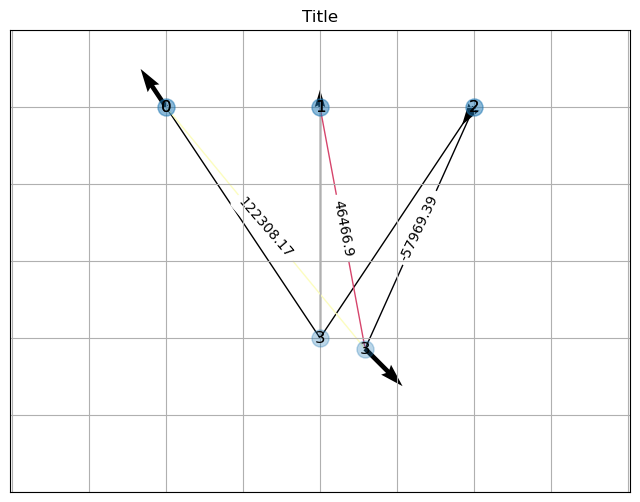

In [2]:
from graph import Nodes, Edges
from truss import Joint, Member, Truss
import numpy as np
from analysis import draw
import matplotlib.pyplot as plt

# Create objects of the joints
j0 = Joint(coordinates=np.array([0,0]), key='0')
j1 = Joint(coordinates=np.array([4,0]), key='1')
j2 = Joint(coordinates=np.array([8,0]), key='2')
j3 = Joint(coordinates=np.array([4,-6]), external_forces=np.array([1.e5, -1.e5]), degrees_of_freedom=np.array([1,1]), key='3')

# Create objects for the truss members
m0 = Member(tail=j0, head=j3, youngs_modulus=2.e11, area=5.e-3, key='A')
m1 = Member(tail=j1, head=j3, youngs_modulus=2.e11, area=5.e-3, key='B')
m2 = Member(tail=j2, head=j3, youngs_modulus=2.e11, area=5.e-3, key='C')

# Assemble joints and members into a truss object
truss = Truss(
	nodes=Nodes(j0, j1, j2, j3),
	edges=Edges(m0, m1, m2)
)

# Solve the truss
truss.solve()

# Get the original and displaced coordinates
coordinates = truss.nodes.get('coordinates')
scale = 1000
displaced_coordinates = coordinates + scale*truss.nodes.get('displacement')

# Get the nodal position
pos = dict(zip(truss.nodes, coordinates))

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('2D truss results')
ax.grid()

# Draw a simple plot of the truss
draw(graph=truss, ax=ax, pos=pos, nlbl='key', eshow=True, elbl=None)

# Get the nodal position
pos = dict(zip(truss.nodes, displaced_coordinates))

# Draw a simple plot of the truss
draw(graph=truss, ax=ax, pos=pos, nlbl='key', eshow=True, elbl='member_force', edecs=2)

# Draw vectors
ax.quiver(*displaced_coordinates.T, *(truss.nodes.get('reaction_forces')).T)

# Set our limits to view the acting vector
ax.set_ylim(-10,2)
plt.show()